In [35]:
# LT: Exclude DepDelay
# ST: Include DepDelay
# Classification: Predict if arrdelay > 0

# Import Necessary Package here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
import gc

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier, plot_importance

import matplotlib.pyplot as plt

# Data Import

In [2]:
# Load CSV 
df = pd.read_csv(r"C:\Users\19665\Documents\ORIE-4741-Project\2016_to_2020_flight_feature_eng_w_Dest_10_10.csv")

In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DepDelay', 'ArrDelay', 'CRSElapsedTime',
       'Distance', 'Severe-Cold_Severity', 'Fog_Severity', 'Hail_Severity',
       'Rain_Severity', 'Snow_Severity', 'Storm_Severity',
       'Other Precipitation_Severity', 'CRSDep_afternoon', 'CRSDep_midnight',
       'CRSDep_morning', 'CRSDep_night', 'CRSArr_afternoon', 'CRSArr_midnight',
       'CRSArr_morning', 'CRSArr_night', 'Q1', 'Q2', 'Q3', 'Q4', 'Mon', 'Tue',
       'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Airline_9E', 'Airline_AA',
       'Airline_AS', 'Airline_B6', 'Airline_DL', 'Airline_EV', 'Airline_F9',
       'Airline_G4', 'Airline_MQ', 'Airline_NK', 'Airline_OH', 'Airline_OO',
       'Airline_UA', 'Airline_VX', 'Airline_WN', 'Airline_YV', 'Airline_YX',
       'Origin_ATL', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW', 'Origin_LAS',
       'Origin_LAX', 'Origin_MCO', 'Origin_ORD', 'Origin_PHX', 'Origin_SEA',
       'Dest_ATL', 'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_LAS', 'Dest_LAX',
       'Dest_M

In [4]:
# Check all columns are in numeric form
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

Series([], dtype: object)

In [5]:
# Check NA value 
df.isnull().values.any()

False

In [6]:
df['is_late'] = df['ArrDelay'] > 0
df = df.drop(columns = ['ArrDelay'])

In [7]:
# Inspect all columns
pd.set_option('display.max_columns', None)
df.head() 

,Year,Month,DayofMonth,DepDelay,CRSElapsedTime,Distance,Severe-Cold_Severity,Fog_Severity,Hail_Severity,Rain_Severity,Snow_Severity,Storm_Severity,Other Precipitation_Severity,CRSDep_afternoon,CRSDep_midnight,CRSDep_morning,CRSDep_night,CRSArr_afternoon,CRSArr_midnight,CRSArr_morning,CRSArr_night,Q1,Q2,Q3,Q4,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_DL,Airline_EV,Airline_F9,Airline_G4,Airline_MQ,Airline_NK,Airline_OH,Airline_OO,Airline_UA,Airline_VX,Airline_WN,Airline_YV,Airline_YX,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_LAS,Origin_LAX,Origin_MCO,Origin_ORD,Origin_PHX,Origin_SEA,Dest_ATL,Dest_CLT,Dest_DEN,Dest_DFW,Dest_LAS,Dest_LAX,Dest_MCO,Dest_ORD,Dest_PHX,Dest_SEA,is_late
0,2016,1,1,0.0,148.0,868.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,False
1,2016,1,2,11.0,148.0,868.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,False
2,2016,1,3,11.0,148.0,868.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,False
3,2016,1,4,2.0,148.0,868.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,True
4,2016,1,5,558.0,149.0,868.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,True


# Feature Selection
As discussed in porposal, we will have two models, one predicting delay before passengers arrive at the airport, and the other one predict delay using all data avaliable until the plane left the ground.

Here, some columns contain data that will only be avaliable when the passengers board the plane (like DepDelay and Weather). We cannot use them in our long-run forecase, but we can include them in our short-run forecast.

In [8]:
weather_columns = ['Severe-Cold', 'Fog', 'Hail', 'Rain', 'Snow', 'Storm', 'Other Precipitation']
ST_columns = ['DepDelay'] 
df_LT = df[df.columns.difference(ST_columns)]
# df_ST = df

In [9]:
del [[df]]
gc.collect()

32

In [10]:
# Specify X and y
X = df_LT.drop(columns = ['is_late'])
y = pd.DataFrame(df_LT['is_late'])

# X = df_ST.drop(columns = ['is_late'])
# y = pd.DataFrame(df_ST['is_late'])


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X.shape

(1969084, 68)

# Model Experimentation
## Logistic regression
As a start, we will fit a simple linear regression with y = is_late

In [15]:
model_balanced = 'balanced'
# model_balanced = None
num_worker = 8

In [29]:
logistic = LogisticRegression(class_weight = model_balanced, n_jobs = num_worker)
logistic.fit(X_train, y_train.values.ravel())

LogisticRegression(class_weight='balanced', n_jobs=8)

In [30]:
# See Train 
pred = logistic.predict(X_train)
print(classification_report(y_train.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.70      0.57      0.63    997540
        True       0.44      0.58      0.50    577727

    accuracy                           0.57   1575267
   macro avg       0.57      0.57      0.56   1575267
weighted avg       0.60      0.57      0.58   1575267



In [31]:
# See Test 
pred = logistic.predict(X_test)
print(classification_report(y_test.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.70      0.57      0.63    249488
        True       0.44      0.58      0.50    144329

    accuracy                           0.57    393817
   macro avg       0.57      0.58      0.56    393817
weighted avg       0.60      0.57      0.58    393817



In [32]:
model_balanced = None
logistic_unbalanced = LogisticRegression(class_weight = model_balanced, n_jobs = num_worker)
logistic_unbalanced.fit(X_train, y_train.values.ravel())

LogisticRegression(n_jobs=8)

In [33]:
# See Train 
pred = logistic_unbalanced.predict(X_train)
print(classification_report(y_train.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.65      0.95      0.77    997540
        True       0.57      0.11      0.18    577727

    accuracy                           0.64   1575267
   macro avg       0.61      0.53      0.48   1575267
weighted avg       0.62      0.64      0.55   1575267



In [34]:
# See Test 
pred = logistic_unbalanced.predict(X_test)
print(classification_report(y_test.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.65      0.95      0.77    249488
        True       0.57      0.11      0.18    144329

    accuracy                           0.64    393817
   macro avg       0.61      0.53      0.48    393817
weighted avg       0.62      0.64      0.55    393817



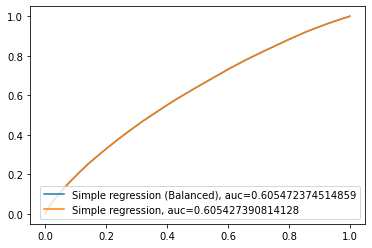

In [35]:
y_pred_proba = logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test.values.ravel(),  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

y_pred_proba_unbalanced = logistic_unbalanced.predict_proba(X_test)[::,1]
fpr_unb, tpr_unb, _ = metrics.roc_curve(y_test.values.ravel(),  y_pred_proba_unbalanced)
auc_unb = metrics.roc_auc_score(y_test, y_pred_proba_unbalanced)

plt.plot(fpr,tpr,label="Simple regression (Balanced), auc="+str(auc))
plt.plot(fpr_unb,tpr_unb,label="Simple regression, auc="+str(auc_unb))
plt.legend(loc=4)
plt.show()

In [36]:
# See dummy majority classfier
pred = np.zeros(y_test.values.shape[0])
print(classification_report(y_test.values.ravel(), pred))

C:\Users\19665\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19665\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.63      1.00      0.78    249488
        True       0.00      0.00      0.00    144329

    accuracy                           0.63    393817
   macro avg       0.32      0.50      0.39    393817
weighted avg       0.40      0.63      0.49    393817



C:\Users\19665\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Simple Decision Tree

In [37]:
model_balanced = 'balanced'
simple_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, class_weight=model_balanced)
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7)

In [22]:
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)
    plt.figure(figsize=(10, 30))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.grid(True)

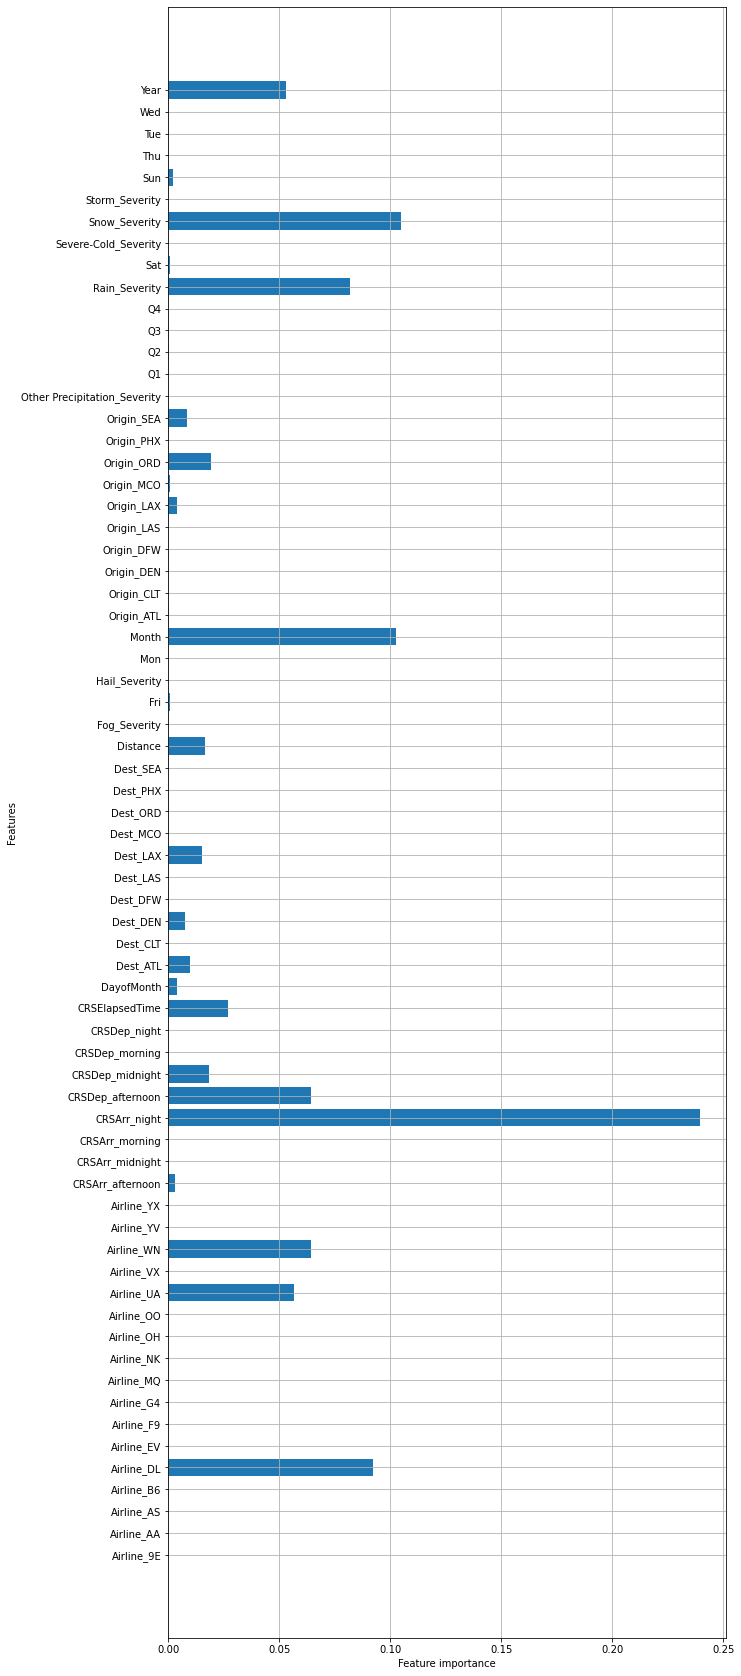

In [39]:
feature_names = X_train.columns.values
plot_feature_importances(simple_tree, feature_names)

In [40]:
# See Train 
pred = simple_tree.predict(X_train)

In [41]:
pd.crosstab(y_train.values.ravel(), pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,611119,386421,997540
True,270282,307445,577727
All,881401,693866,1575267


In [42]:
print(classification_report(y_train.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.69      0.61      0.65    997540
        True       0.44      0.53      0.48    577727

    accuracy                           0.58   1575267
   macro avg       0.57      0.57      0.57   1575267
weighted avg       0.60      0.58      0.59   1575267



In [43]:
pred = simple_tree.predict(X_test)
pd.crosstab(y_test.values.ravel(), pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,152860,96628,249488
True,67453,76876,144329
All,220313,173504,393817


In [44]:
print(classification_report(y_test.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.69      0.61      0.65    249488
        True       0.44      0.53      0.48    144329

    accuracy                           0.58    393817
   macro avg       0.57      0.57      0.57    393817
weighted avg       0.60      0.58      0.59    393817



## Random Forest

In [51]:
model_balanced = 'balanced'
forest = RandomForestClassifier(criterion='entropy', n_estimators = 175, max_depth = 7, n_jobs = num_worker, verbose = 1, max_features = 'sqrt', class_weight=model_balanced)

In [52]:
forest.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=8)]: Done 175 out of 175 | elapsed:  1.1min finished


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features='sqrt', n_estimators=175,
                       n_jobs=8, verbose=1)

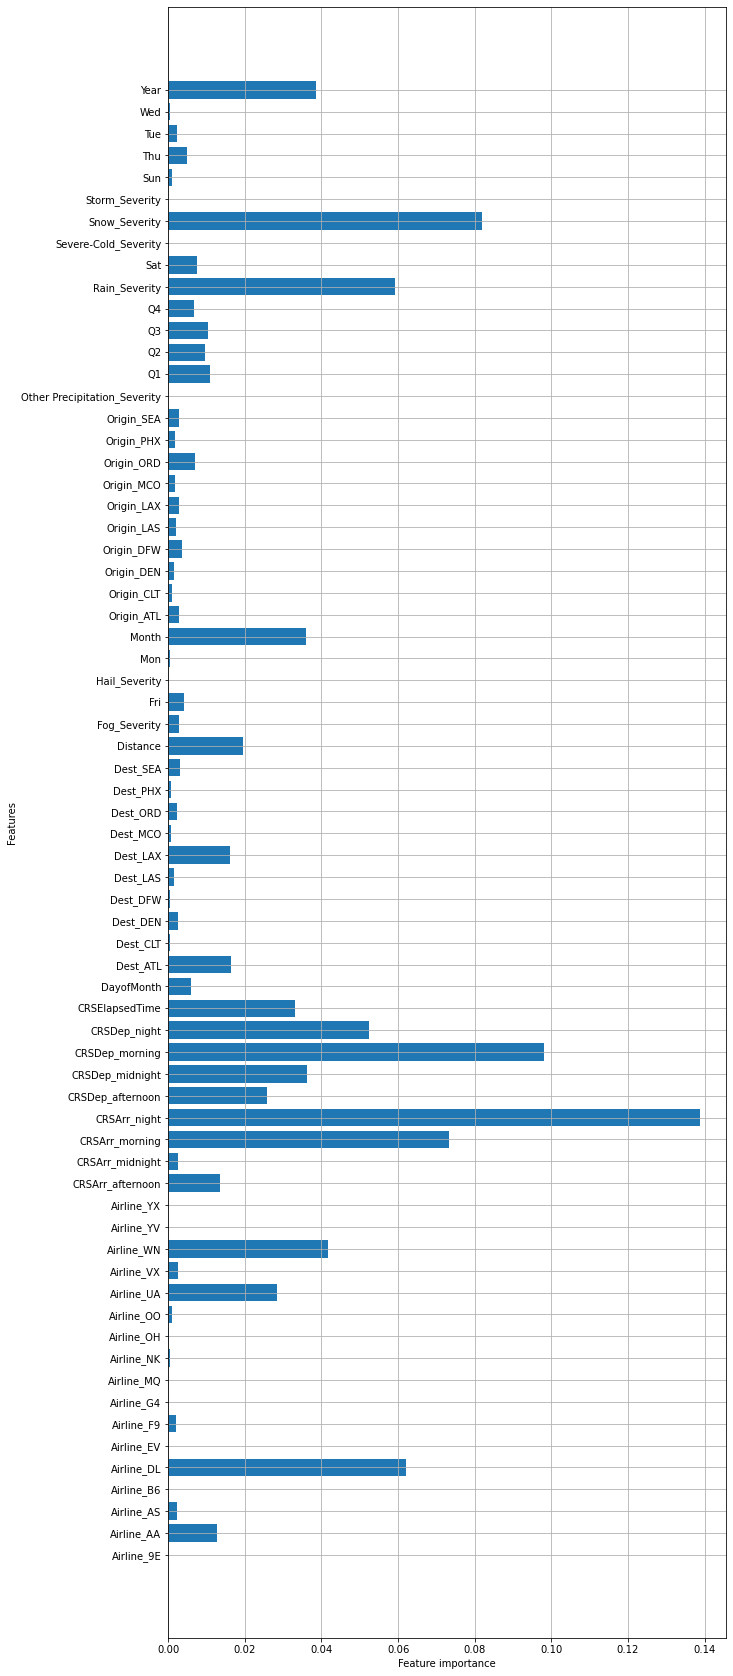

In [53]:
feature_names = X_train.columns.values
plot_feature_importances(forest, feature_names)

In [54]:
# See Train 
pred = forest.predict(X_train)
print(classification_report(y_train.values.ravel(), pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 175 out of 175 | elapsed:    3.7s finished


              precision    recall  f1-score   support

       False       0.70      0.60      0.65    997540
        True       0.45      0.56      0.50    577727

    accuracy                           0.58   1575267
   macro avg       0.57      0.58      0.57   1575267
weighted avg       0.61      0.58      0.59   1575267



In [55]:
# See Test 
pred = forest.predict(X_test)
print(classification_report(y_test.values.ravel(), pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 175 out of 175 | elapsed:    0.8s finished


              precision    recall  f1-score   support

       False       0.70      0.60      0.65    249488
        True       0.45      0.56      0.50    144329

    accuracy                           0.58    393817
   macro avg       0.57      0.58      0.57    393817
weighted avg       0.61      0.58      0.59    393817



In [56]:
pd.crosstab(y_test.values.ravel(), pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,149208,100280,249488
True,63228,81101,144329
All,212436,181381,393817


In [16]:
model_balanced = None
forest = RandomForestClassifier(criterion='entropy', n_estimators = 175, max_depth = 7, n_jobs = num_worker, verbose = 1, max_features = 'sqrt', class_weight=model_balanced)
forest.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   15.0s
[Parallel(n_jobs=8)]: Done 175 out of 175 | elapsed:  1.1min finished


RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       n_estimators=175, n_jobs=8, verbose=1)

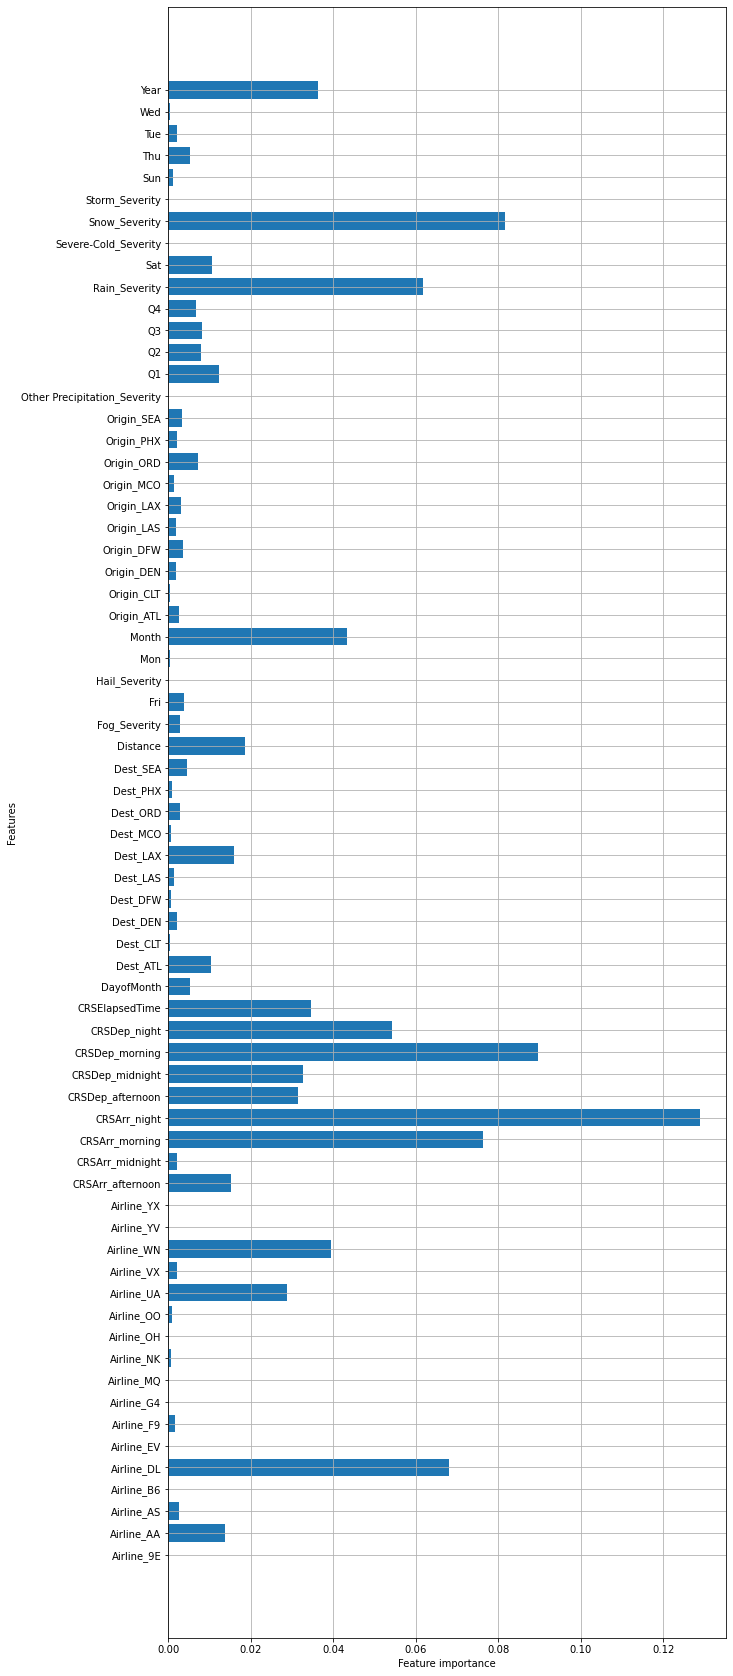

In [17]:
feature_names = X_train.columns.values
plot_feature_importances(forest, feature_names)

In [18]:
# See Test 
pred = forest.predict(X_test)
print(classification_report(y_test.values.ravel(), pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 175 out of 175 | elapsed:    0.8s finished


              precision    recall  f1-score   support

       False       0.64      0.99      0.78    249427
        True       0.74      0.04      0.07    144390

    accuracy                           0.64    393817
   macro avg       0.69      0.51      0.42    393817
weighted avg       0.68      0.64      0.52    393817



## Gradient Boosting


In [20]:
model_balanced = None
subsample_size =  0.5
max_depth = 5
learning_rate = 0.1
grad_boosting = GradientBoostingClassifier(learning_rate = learning_rate, subsample = subsample_size, max_depth = max_depth, verbose = 1, )

In [21]:
grad_boosting.fit(X_train, y_train.values.ravel())

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3095           0.0051            6.02m
         2           1.3051           0.0042            5.91m
         3           1.3014           0.0036            5.85m
         4           1.2983           0.0030            5.79m
         5           1.2954           0.0030            5.72m
         6           1.2925           0.0025            5.66m
         7           1.2902           0.0022            5.64m
         8           1.2897           0.0019            5.56m
         9           1.2857           0.0025            5.50m
        10           1.2850           0.0015            5.44m
        20           1.2713           0.0011            4.78m
        30           1.2635           0.0008            4.15m
        40           1.2593           0.0004            3.53m
        50           1.2556           0.0004            2.92m
        60           1.2512           0.0003            2.32m
       

GradientBoostingClassifier(max_depth=5, subsample=0.5, verbose=1)

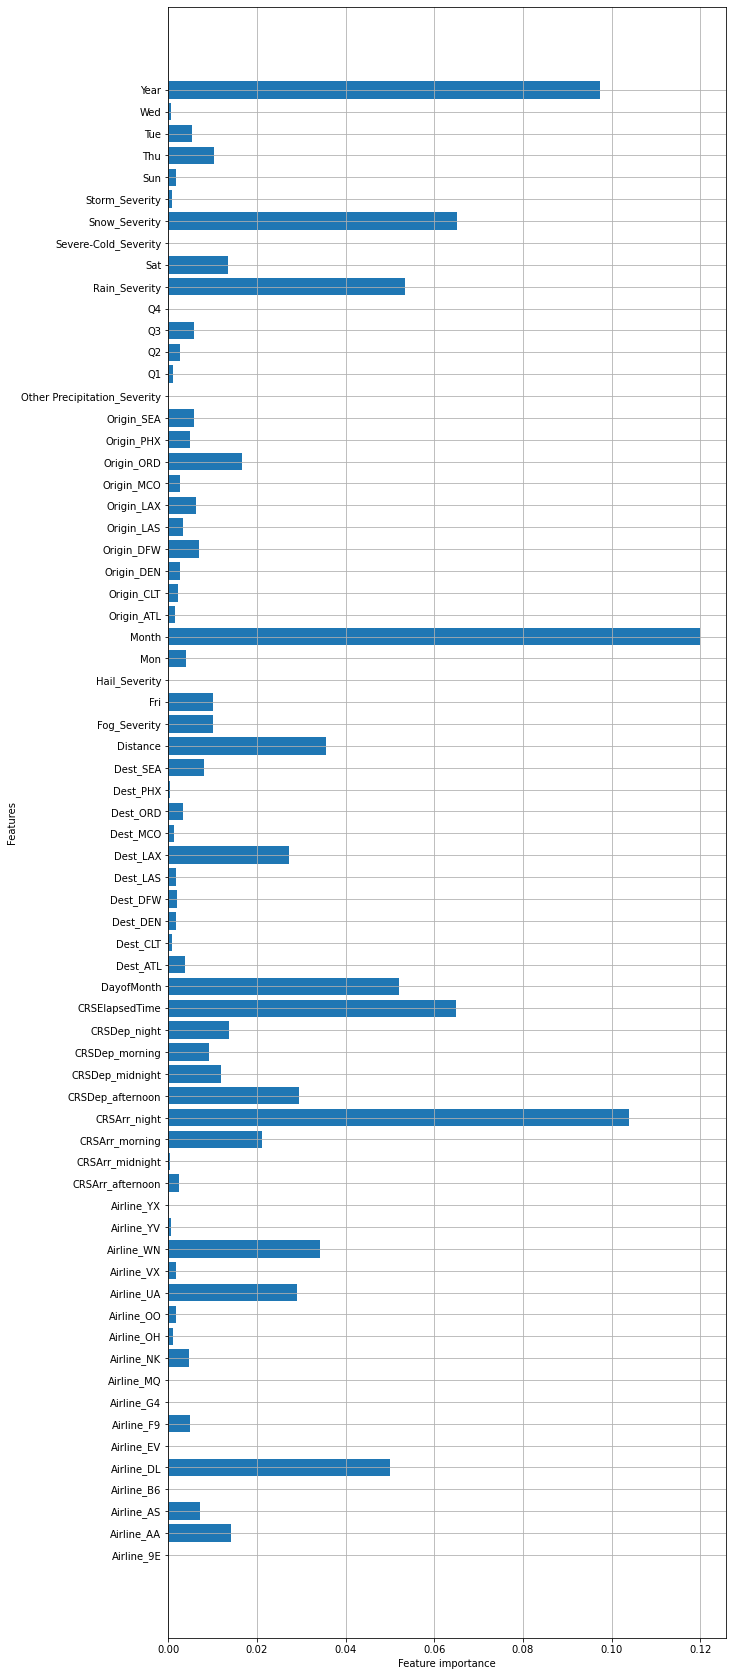

In [23]:
feature_names = X_train.columns.values
plot_feature_importances(grad_boosting, feature_names)

In [24]:
# See Test 
pred = grad_boosting.predict(X_test)
print(classification_report(y_test.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.66      0.94      0.78    249427
        True       0.64      0.18      0.28    144390

    accuracy                           0.66    393817
   macro avg       0.65      0.56      0.53    393817
weighted avg       0.65      0.66      0.60    393817



## AdaBoost


In [27]:
n_estimator = 100
ada_boosting = AdaBoostClassifier(n_estimators = n_estimator)

In [28]:
ada_boosting.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(n_estimators=100)

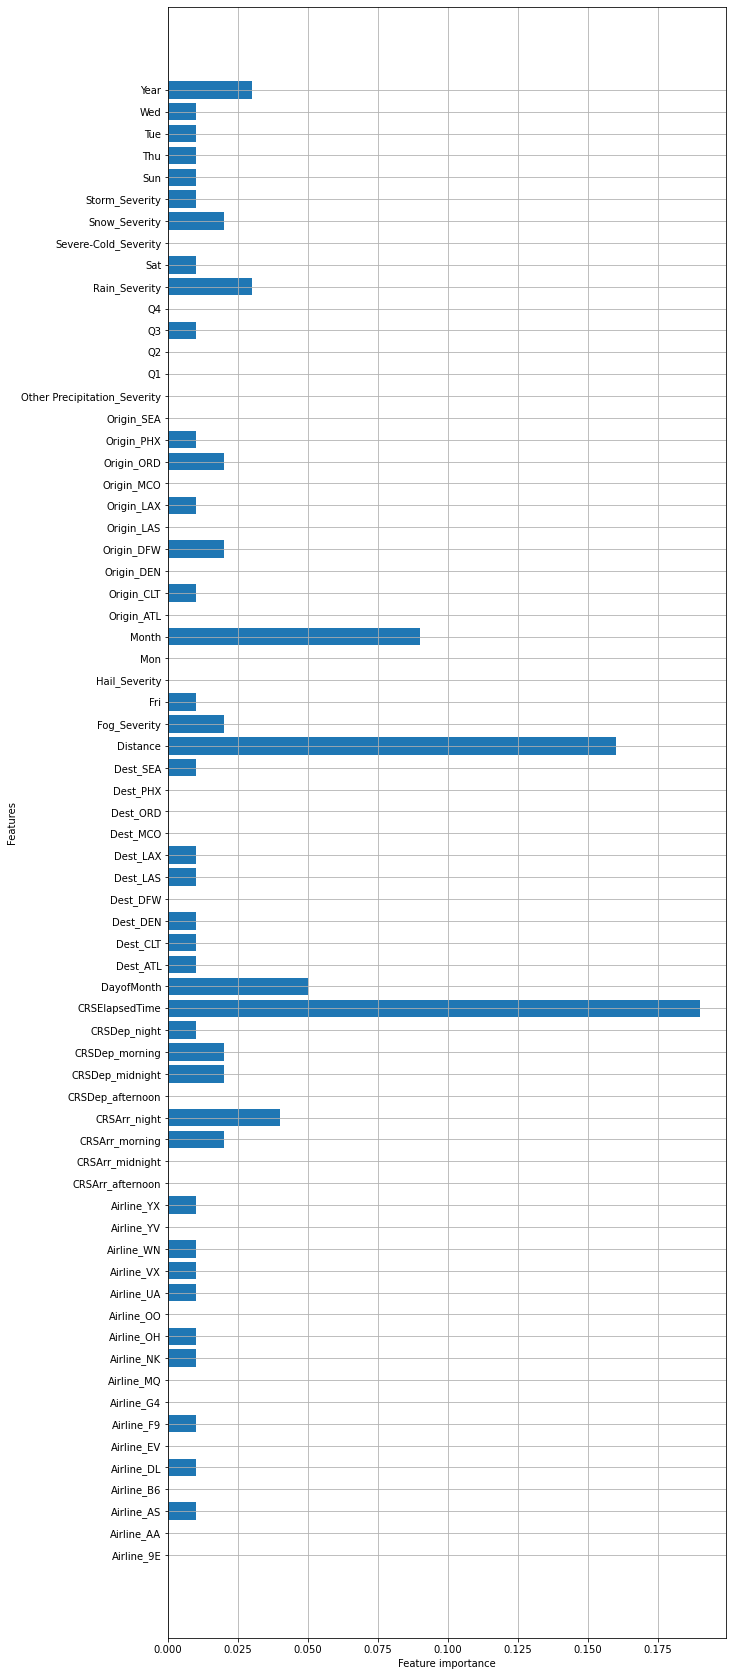

In [29]:
feature_names = X_train.columns.values
plot_feature_importances(ada_boosting, feature_names)

In [30]:
# See Test 
pred = ada_boosting.predict(X_test)
print(classification_report(y_test.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.66      0.94      0.77    249427
        True       0.60      0.15      0.24    144390

    accuracy                           0.65    393817
   macro avg       0.63      0.54      0.50    393817
weighted avg       0.64      0.65      0.58    393817



## XGBoost

In [41]:
learning_rate = 0.1
max_depth = 8
min_child_weight = 10
subsample = 0.5
n_estimators = 200

xg_boosting = XGBClassifier(learning_rate = learning_rate, max_depth = max_depth, min_child_weight=min_child_weight, subsample= subsample, n_estimators = n_estimators)

In [42]:
xg_boosting.fit(X_train, y_train)

C:\Users\19665\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\19665\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[14:25:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

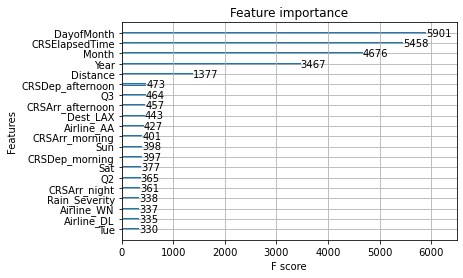

In [43]:
plot_importance(xg_boosting,max_num_features = 20)

In [44]:
# See Test 
pred = xg_boosting.predict(X_test)
print(classification_report(y_test.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.69      0.91      0.78    249427
        True       0.65      0.29      0.40    144390

    accuracy                           0.68    393817
   macro avg       0.67      0.60      0.59    393817
weighted avg       0.68      0.68      0.64    393817

